In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [7]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>2]
    data = data.sample(frac=1)
    #display(data.describe())
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    data_sig = data[['significance']]
    data_val = data.drop(columns=['flux_significance' ,  'index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name'])
    
    #display(data_val)
    #import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    data_val = data_val.replace(np.nan , 0)

    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    return data , data_val , data_class , data_id , data_sig 

In [8]:
train_bh = pd.read_csv('processed_data/BH_train.csv')
train_bh = train_bh.sample(frac=1)
#display(data_bh)
display(train_bh.describe())
train_ns = pd.read_csv('processed_data/NS_train.csv')
train_ns = train_ns.sample(frac=1)
#display(data_ns)
display(train_ns.describe())

train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1)

train_data ,  data_val , data_class , data_id , data_sig = filter_data(train)

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,196.000000,196.000000,196.000000,196.000000,1.930000e+02,193.000000,193.000000,139.000000,139.000000,139.000000,...,47.000000,47.000000,45.000000,47.000000,47.000000,46.000000,47.000000,47.000000,47.000000,37.000000
mean,14.862245,59402.678061,138.639796,174826.660206,3.287452e-04,0.801937,5.890674,0.120123,0.074414,0.094797,...,12.146017,12.077670,12.649644,5.955149,950.466589,883.404853,0.930015,0.817519,738.218619,839.425676
std,19.749103,53823.899344,152.797198,218792.266306,7.414555e-04,0.161362,1.867629,0.533752,0.373784,0.428364,...,1.032850,0.959872,44.447784,14.426922,715.590015,671.621356,0.561396,0.399142,569.935982,458.292015
min,0.000000,4256.000000,1.840000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,10.713993,10.694434,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,2.000000,18251.500000,14.070000,1205.131000,5.171680e-07,0.807400,5.200000,0.000359,0.000218,0.000230,...,11.327724,11.312185,1.771000,1.532500,62.105000,56.785000,0.774600,0.691900,23.565000,425.600000
50%,5.000000,41016.850000,26.510000,4017.937000,1.183580e-05,0.830200,7.000000,0.000871,0.000566,0.000619,...,11.820448,11.766243,1.930000,1.724000,1415.000000,1311.000000,0.833400,0.777300,1062.000000,1117.000000
75%,21.250000,75682.200000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.018506,0.008889,0.011905,...,13.029830,12.987179,4.313000,3.117000,1560.500000,1469.750000,0.868600,0.822800,1226.000000,1146.000000
max,70.000000,184208.000000,337.000000,462011.400000,3.960122e-03,1.000000,8.000000,4.403000,3.219000,3.219000,...,14.354381,14.233364,268.600000,81.320000,1644.000000,1559.000000,3.964000,2.682000,1300.000000,1231.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,444.000000,444.000000,444.000000,4.440000e+02,3.620000e+02,362.000000,362.000000,240.000000,240.000000,240.000000,...,89.000000,89.000000,75.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,63.000000
mean,20.317568,17768.214640,76.654595,inf,1.285977e-03,0.864793,6.424217,0.099555,0.084872,0.089676,...,11.906666,11.853320,6.037916,13.849285,240.669438,210.147932,1.757757,0.746182,149.226413,164.183652
std,23.344521,20929.538298,104.446038,inf,2.862941e-03,0.218248,2.191820,0.366372,0.354697,0.357252,...,0.901398,0.861392,12.088292,28.614688,360.288045,305.511685,8.755496,0.602857,251.527625,217.618784
min,0.000000,916.000000,1.870000,9.272045e+00,3.118000e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,9.764219,9.755723,0.357500,0.289700,10.860000,3.825000,0.216200,0.189000,0.007671,0.000000
25%,3.000000,4105.725000,5.462500,1.403164e+02,7.351000e-06,0.759600,5.200000,0.001618,0.000931,0.001154,...,11.401757,11.375718,0.778850,0.677600,34.860000,27.147500,0.344200,0.303300,7.737000,20.470000
50%,10.500000,7258.500000,49.260000,1.504925e+03,1.176452e-05,1.000000,7.800000,0.005555,0.003026,0.004070,...,11.937794,11.880744,1.249000,1.209000,53.250000,45.030000,0.555300,0.532200,29.890000,97.740000
75%,32.000000,27885.000000,107.710000,9.049175e+03,1.277774e-03,1.000000,8.000000,0.054817,0.033354,0.048235,...,12.399790,12.352715,5.395500,6.741000,213.600000,195.600000,1.023000,0.869200,135.400000,134.300000
max,94.000000,166689.200000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,4.011572,4.008746,4.009324,...,13.691649,13.522011,75.050000,99.720000,1712.000000,1195.000000,83.130000,2.837000,1211.000000,753.100000


In [9]:
train_data[['flux_aper_hilim' , 'flux_aper_lolim' ,'flux_aper']].describe()

,flux_aper_hilim,flux_aper_lolim,flux_aper
count,440.000000,440.000000,440.000000
mean,13.905354,14.486547,14.171078
std,0.827189,1.133711,0.934156
min,11.886136,12.022661,12.009448
25%,13.337670,13.748880,13.529079
50%,13.897466,14.492019,14.202520
75%,14.548175,15.236830,14.837463
max,16.031949,17.980053,16.724746


In [10]:
data_bh_clean = train_data[data_class['class']=='BH']
display(data_bh_clean.describe())
data_ns_clean = train_data[data_class['class']=='NS']
display(data_ns_clean.describe())

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,152.000000,152.000000,152.000000,152.000000,1.490000e+02,149.000000,149.000000,112.000000,112.000000,112.000000,...,24.000000,24.000000,23.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,14.000000
mean,10.664474,66826.644079,114.732237,142083.236421,1.573601e-04,0.794317,5.715101,0.007248,0.003710,0.004399,...,12.942296,12.829105,4.906348,5.966875,468.447488,404.352750,0.872675,0.712267,357.518963,490.360000
std,15.618356,55866.763702,147.316646,211526.456353,2.190009e-04,0.162622,1.912404,0.027555,0.009989,0.011342,...,0.847684,0.759457,4.968386,16.129555,654.094297,590.063893,0.698905,0.448730,523.250272,513.463617
min,0.000000,4256.000000,2.110000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,11.820448,11.766243,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,1.750000,25256.900000,14.070000,1205.131000,4.777600e-07,0.807400,4.800000,0.000325,0.000179,0.000194,...,12.210338,12.165163,2.245000,1.478750,11.612750,5.769500,0.548050,0.496575,0.991300,21.342500
50%,4.500000,45343.250000,17.390000,1313.561000,1.771040e-06,0.830200,7.000000,0.000539,0.000311,0.000330,...,13.029830,12.987179,3.550000,2.280500,66.240000,57.580000,0.793500,0.691900,27.225000,329.150000
75%,10.000000,83357.325000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.002863,0.002170,0.002251,...,13.323269,13.185855,4.792500,3.456000,922.675000,588.750000,0.841275,0.752400,738.650000,1097.500000
max,70.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,0.264078,0.057274,0.060776,...,14.354381,14.233364,24.980000,81.320000,1627.000000,1485.000000,3.964000,2.682000,1299.000000,1169.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,288.000000,288.000000,288.000000,2.880000e+02,2.520000e+02,252.000000,252.000000,199.000000,199.000000,199.000000,...,49.000000,49.000000,46.000000,49.000000,49.000000,48.000000,49.000000,49.000000,49.000000,28.000000
mean,21.173611,19479.384722,51.761146,inf,6.124296e-04,0.874396,6.488757,0.021785,0.010275,0.012838,...,12.540337,12.464466,3.455798,2.693439,104.061224,72.020063,2.188680,0.458331,60.985810,46.035821
std,26.045746,21007.812054,80.620503,inf,2.248977e-03,0.217187,2.217818,0.084701,0.023171,0.025455,...,0.557011,0.504375,6.747395,5.496750,272.484009,156.551289,11.809504,0.307799,192.933092,86.383676
min,0.000000,977.000000,2.320000,1.257282e+01,3.118000e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,11.472370,11.449283,0.357500,0.289700,11.910000,6.983000,0.216200,0.189000,0.077480,0.000000
25%,2.000000,4112.125000,6.770000,1.627296e+02,7.351000e-06,0.794000,5.200000,0.001406,0.000777,0.000859,...,12.177963,12.135845,0.669675,0.577800,24.800000,19.560000,0.289400,0.275000,1.131000,14.370000
50%,8.000000,12178.500000,41.030000,5.716484e+03,7.351000e-06,1.000000,8.000000,0.003617,0.001967,0.002380,...,12.350373,12.305044,0.850750,0.693900,42.410000,34.720000,0.354100,0.318000,20.170000,20.470000
75%,35.000000,28597.000000,49.260000,9.049175e+03,4.857080e-05,1.000000,8.000000,0.011974,0.005730,0.008049,...,13.017684,12.959398,1.723000,2.429000,51.720000,44.040000,0.657600,0.537500,29.650000,31.610000
max,94.000000,158025.600000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,1.128588,0.203490,0.203719,...,13.691649,13.522011,35.720000,32.540000,1712.000000,800.600000,83.130000,1.651000,1211.000000,455.500000


In [11]:
def split_data(x,y,s,id,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    s_train = s[:split_no]
    s_test = s[split_no:]
    id_train = id[:split_no]
    id_test = id[split_no:]
    return (x_train , y_train , s_train , id_train ) , (x_test , y_test , s_test , id_test)

x = data_val.to_numpy()
y = data_class.to_numpy()
s = data_sig.to_numpy()
s = s
#s = [float(si) for si in s]
(x_train , y_train , s_train , id_train) , (x_test , y_test , s_test , id_test) =  split_data(x, y,s, data_id , 1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(440, 92) (440, 1)
(0, 92) (0, 1)


# Neural Network

In [12]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]
y_train_int = class_to_int(y_train, classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
#one_hot_y_test =  to_categorical(y_test_int)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

In [13]:
desc_class = pd.DataFrame()
y_class_ser = (np.asarray(y_train).reshape(len(y_train)))
desc_class.insert(0, 'cl', y_class_ser)
ns_n = desc_class.value_counts()['NS']
bh_n= desc_class.value_counts()['BH']
print(ns_n , bh_n)

288 152


In [14]:

def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(32, activation='relu')
    x = dense(inputs)
    #x =  layers.BatchNormalization(axis=-1)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(4, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([32,32,16,8] , x_train.shape[1])
class_weight = {0: (ns_n/(ns_n+bh_n)),
                1: (bh_n/(ns_n+bh_n))}
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=70, validation_split=0.2 , class_weight=class_weight , sample_weight=s_train*5)


2021-09-30 17:26:12.586673: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-30 17:26:12.587007: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-30 17:26:12.587396: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-30 17:26:12.861288: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-30 17:26:12.881233: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/70
11/11 [==============================] - 3s 76ms/step - loss: 118.9513 - accuracy: 0.3963 - val_loss: 266.9161 - val_accuracy: 0.3977
Epoch 2/70
11/11 [==============================] - 0s 29ms/step - loss: 132.5035 - accuracy: 0.4113 - val_loss: 259.7259 - val_accuracy: 0.4318
Epoch 3/70
11/11 [==============================] - 0s 26ms/step - loss: 110.2937 - accuracy: 0.4788 - val_loss: 250.9409 - val_accuracy: 0.4545
Epoch 4/70
11/11 [==============================] - 0s 24ms/step - loss: 110.6320 - accuracy: 0.5038 - val_loss: 242.3081 - val_accuracy: 0.4659
Epoch 5/70
11/11 [==============================] - 0s 28ms/step - loss: 109.6245 - accuracy: 0.5316 - val_loss: 233.5934 - val_accuracy: 0.4545
Epoch 6/70
11/11 [==============================] - 0s 28ms/step - loss: 104.0330 - accuracy: 0.5479 - val_loss: 224.9740 - val_accuracy: 0.4432
Epoch 7/70
11/11 [==============================] - 0s 27ms/step - loss: 98.9057 - accuracy: 0.5622 - val_loss: 213.8886 - val_acc

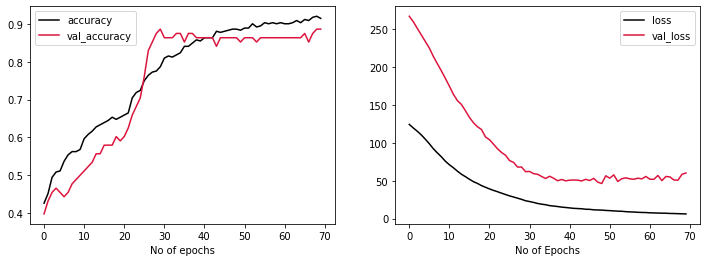

In [15]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()

In [43]:
model.save('models/NN_NS_BH.mdl')
#np.save('test_data/NN_NS_BH.cv' , x_test)
#np.save('test_data/NN_NS_BH_label.cv' , one_hot_y_test)

2021-09-29 11:17:31.487228: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/NN_NS_BH.mdl/assets


In [16]:
import seaborn as sns

In [17]:
%reload_ext autoreload

In [18]:
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

In [19]:
font = {'size'   : 14}
plt.rc('font', **font)

In [20]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

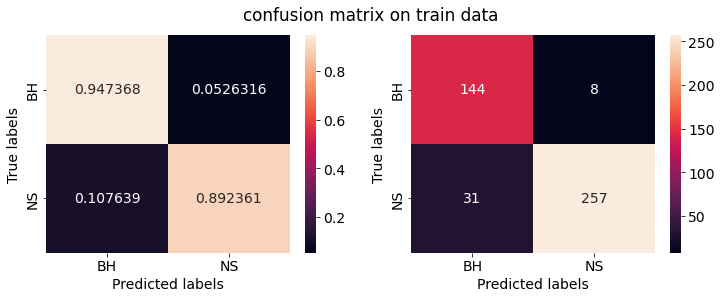

In [21]:
cf = conf_matrix(model , x_train, one_hot_y_train)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels'); 
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']); 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

## TEST

In [22]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
display(test_bh.describe())
test_ns = pd.read_csv('processed_data/NS_test.csv')
test_pulsar = pd.read_csv('processed_data/PULSAR.csv')
test_cv = pd.read_csv('processed_data/CV.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test = test.sample(frac=1)
test_data , t_val , t_class , t_id , t_sig = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

/home/kumaran/miniconda3/envs/ciao-4.13/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/kumaran/miniconda3/envs/ciao-4.13/lib/python3.8/site-packages/numpy/lib/function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,7.000000,7.000000,7.000000,...,1.000000,1.000000,1.000,1.000,1.00,1.00,1.0000,1.000,1.0,1.00
mean,3.428571,24752.907143,9.953571,770.519286,1.589223e-06,0.862181,5.985714,0.002635,0.001620,0.001855,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
std,3.106180,8954.116678,5.915179,1180.940914,1.862492e-07,0.206559,1.853835,0.001572,0.001245,0.001450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,11007.400000,6.900000,155.700000,1.470060e-06,0.492600,2.600000,0.000454,0.000305,0.000312,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
25%,1.000000,19992.250000,6.900000,155.700000,1.561667e-06,0.837133,6.250000,0.001452,0.000655,0.000753,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
50%,2.500000,21837.150000,6.900000,155.700000,1.561667e-06,0.980333,7.000000,0.003014,0.000975,0.001075,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
75%,5.750000,28593.975000,7.552500,331.831500,1.561667e-06,0.980333,7.000000,0.003887,0.002780,0.003226,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
max,9.000000,40036.900000,20.860000,2946.576000,2.222280e-06,0.980333,7.000000,0.004297,0.003189,0.003639,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05


,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,var_sigma,kp_prob,ks_prob,var_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,...,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,3.670899e-17,9.562243e-16,2.220446e-16,-3.917118e-18,-1.432546e-17,-2.753174e-17,-5.148212e-18,-1.539987e-16,-1.683241e-16,5.730183e-17,...,-1.790682e-17,1.432546e-17,2.148819e-17,3.581365e-18,3.939501e-17,1.790682e-17,-7.162729e-18,1.790682e-17,1.790682e-18,-1.253478e-17
std,4.090864e-01,7.463216e-01,5.538007e-01,2.130346e-01,1.911378e-01,1.972021e-01,1.859678e-01,6.850382e-01,6.180842e-01,5.559508e-01,...,4.217987e-01,4.224963e-01,2.723223e-01,3.241809e-01,3.874709e-01,2.660025e-01,2.293464e-01,2.342268e-01,2.361100e-01,2.198932e-01
min,-1.944453e-01,-2.728180e+00,-1.444554e+00,-7.420851e-02,-5.513682e-02,-6.036964e-02,-4.600840e-02,-1.147578e+00,-1.023346e+00,-1.111911e+00,...,-1.817766e-01,-1.821066e-01,-9.623702e-02,-1.193823e-01,-1.649069e-01,-8.424301e-02,-8.347304e-02,-8.770712e-02,-7.243333e-02,-6.294149e-02
25%,-1.917845e-01,-1.548036e-01,-2.222770e-01,-6.518085e-02,-4.929534e-02,-5.393933e-02,-4.278482e-02,-4.426660e-01,-5.524597e-01,-2.121028e-01,...,-1.817766e-01,-1.821066e-01,-9.623702e-02,-1.193823e-01,-1.649069e-01,-8.424301e-02,-8.347304e-02,-8.770712e-02,-7.243333e-02,-6.294149e-02
50%,-1.917845e-01,-1.548036e-01,-2.222770e-01,-5.519050e-02,-4.679256e-02,-5.130059e-02,-3.757976e-02,-1.768555e-02,1.113858e-01,6.934104e-02,...,-1.817766e-01,-1.821066e-01,-9.623702e-02,-1.193823e-01,-1.649069e-01,-8.424301e-02,-8.347304e-02,-8.770712e-02,-7.243333e-02,-6.294149e-02
75%,-1.899962e-01,4.743267e-01,3.888615e-01,-3.561725e-02,-2.866804e-02,-3.169759e-02,-2.568655e-02,6.614426e-01,4.360793e-01,4.126890e-01,...,-1.817766e-01,-1.821066e-01,-9.623702e-02,-1.193823e-01,-1.649069e-01,-8.424301e-02,-8.347304e-02,-8.770712e-02,-7.243333e-02,-6.294149e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


(31, 2)


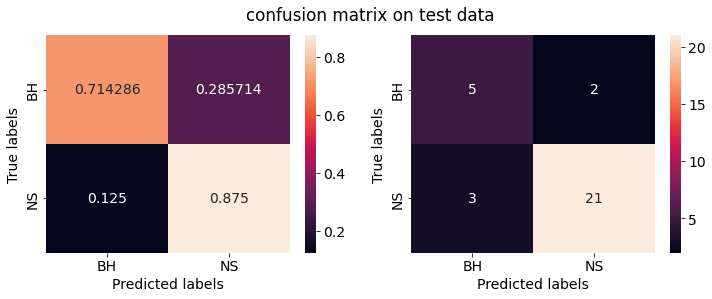

In [23]:
cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

In [24]:
y_test_pred_prob =  model.predict(x_test)
y_test_pred = []
for yi in y_test_pred_prob:
    temp = [0]*len(yi)
    temp[np.argmax(yi)] = 1
    y_test_pred.append(temp)
y_test_pred =  np.asarray(y_test_pred)
miss_cl_data = pd.DataFrame()
missed_src = []
for yp , yh , si ,  y_prob in zip(y_test_pred , one_hot_y_test , t_id , y_test_pred_prob):
    chk = np.dot(yp,yh)
    if(chk<1):
        #print(y_prob,  si)
        data_sneak = test[test['src_id'] == si]
        display(data_sneak)
        miss_cl_data = miss_cl_data.append(data_sneak)
        missed_src.append(si)
miss_src_cnt =  pd.DataFrame()
miss_src_cnt.insert(0,'src' ,missed_src)
miss_src_cnt = miss_src_cnt['src'].value_counts()
display(miss_src_cnt)
display(miss_cl_data)
#missed_src_count = missed_src.count_val()

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
4,0,NS,NS0054,BW ANT,24445.9,3.7,75.53454,2004-03-18T02:40:52,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,BH,BH0003,GINGA 1354-645,39516.5,20.86,2946.576,2010-09-30T23:42:24,0.000001,0.4926,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
1,1,BH,BH0003,GINGA 1354-645,19807.2,20.86,2946.576,2012-10-31T17:20:25,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BH,BH0003,GINGA 1354-645,19803.6,20.86,2946.576,2012-11-03T09:23:02,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
6,1,NS,NS0055,J1748-2021#1,2511.9,28.02,1.797693e+308,2001-08-18T20:22:09,0.000508,0.859,...,11.326610,11.282912,NaN,48.3300,96.01,83.61,1.2410,1.1180,39.75,28.14
5,0,NS,NS0055,J1748-2021#1,23277.7,28.02,1.797693e+308,2000-07-04T13:50:57,0.000508,0.859,...,13.520713,13.336393,1.1720,0.7656,69.83,51.35,0.4086,0.3268,46.59,27.27
8,3,NS,NS0055,J1748-2021#1,49114.6,28.02,1.797693e+308,2009-07-28T15:16:17,0.000508,0.859,...,13.772628,13.634887,0.5385,0.3721,102.00,74.91,0.2864,0.2257,75.67,48.25
9,4,NS,NS0055,J1748-2021#1,4909.3,28.02,1.797693e+308,2009-08-10T08:26:55,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,NS,NS0055,J1748-2021#1,24046.1,28.02,1.797693e+308,2003-06-27T09:09:58,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,NS,NS0003,1A 1743-288,11611.1,42.8,6766.946,2001-07-18T00:58:41,0.000217,0.99675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NS,NS0003,1A 1743-288,38198.1,42.8,6766.946,2007-02-14T04:23:34,0.000217,0.99675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,BH,BH0003,GINGA 1354-645,39516.5,20.86,2946.576,2010-09-30T23:42:24,0.000001,0.4926,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
1,1,BH,BH0003,GINGA 1354-645,19807.2,20.86,2946.576,2012-10-31T17:20:25,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BH,BH0003,GINGA 1354-645,19803.6,20.86,2946.576,2012-11-03T09:23:02,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


BH0003    2
NS0054    1
NS0055    1
NS0003    1
Name: src, dtype: int64

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
4,0,NS,NS0054,BW ANT,24445.9,3.70,7.553454e+01,2004-03-18T02:40:52,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,BH,BH0003,GINGA 1354-645,39516.5,20.86,2.946576e+03,2010-09-30T23:42:24,0.000001,0.49260,...,13.372737,13.236872,5.1390,2.6140,76.58,54.17,0.7901,0.6270,35.20,13.05
1,1,BH,BH0003,GINGA 1354-645,19807.2,20.86,2.946576e+03,2012-10-31T17:20:25,0.000001,0.49260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BH,BH0003,GINGA 1354-645,19803.6,20.86,2.946576e+03,2012-11-03T09:23:02,0.000001,0.49260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NS,NS0055,J1748-2021#1,2511.9,28.02,1.797693e+308,2001-08-18T20:22:09,0.000508,0.85900,...,11.326610,11.282912,NaN,48.3300,96.01,83.61,1.2410,1.1180,39.75,28.14
5,0,NS,NS0055,J1748-2021#1,23277.7,28.02,1.797693e+308,2000-07-04T13:50:57,0.000508,0.85900,...,13.520713,13.336393,1.1720,0.7656,69.83,51.35,0.4086,0.3268,46.59,27.27
8,3,NS,NS0055,J1748-2021#1,49114.6,28.02,1.797693e+308,2009-07-28T15:16:17,0.000508,0.85900,...,13.772628,13.634887,0.5385,0.3721,102.00,74.91,0.2864,0.2257,75.67,48.25
9,4,NS,NS0055,J1748-2021#1,4909.3,28.02,1.797693e+308,2009-08-10T08:26:55,0.000508,0.85900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,NS,NS0055,J1748-2021#1,24046.1,28.02,1.797693e+308,2003-06-27T09:09:58,0.000508,0.85900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,NS,NS0003,1A 1743-288,11611.1,42.80,6.766946e+03,2001-07-18T00:58:41,0.000217,0.99675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
data_sneak = test[test['src_id'] == 'NS0061']
display(data_sneak)

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
